This Notebook contains data showing Drosophila Spectral Sensitivity and how we use it to convert full scale images into greyscale for Drosophila

In [2]:
from matplotlib import pyplot as plt
import numpy as np


In [3]:
receptor_fits = np.genfromtxt('ReceptorFits.csv', delimiter=',')[1:].transpose()
x = receptor_fits[0]
uv = receptor_fits[3]
blue = receptor_fits[4]
amber = receptor_fits[5]

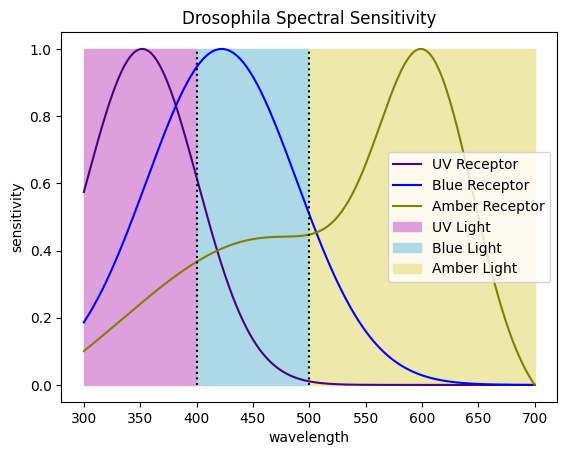

In [72]:
# plotting curves
plt.plot(x, uv, color='indigo', label='UV Receptor')
plt.plot(x, blue, color='blue', label='Blue Receptor')
plt.plot(x, amber, color='olive', label='Amber Receptor')

# marking breakpoints for life type
plt.vlines(400, 0, 1, linestyles='dotted', color='Black')
plt.vlines(500, 0, 1, linestyles='dotted', color='Black')
plt.fill_between([300,400],[1,1], color='plum',label='UV Light')
plt.fill_between([400,500],[1,1], color='lightblue',label='Blue Light')
plt.fill_between([500,700],[1,1], color='palegoldenrod',label='Amber Light')

# legend
plt.xlabel("wavelength")
plt.ylabel("sensitivity")
plt.title("Drosophila Spectral Sensitivity")
plt.legend()

For UV, we take the integral of all three curves over these three separate domains.

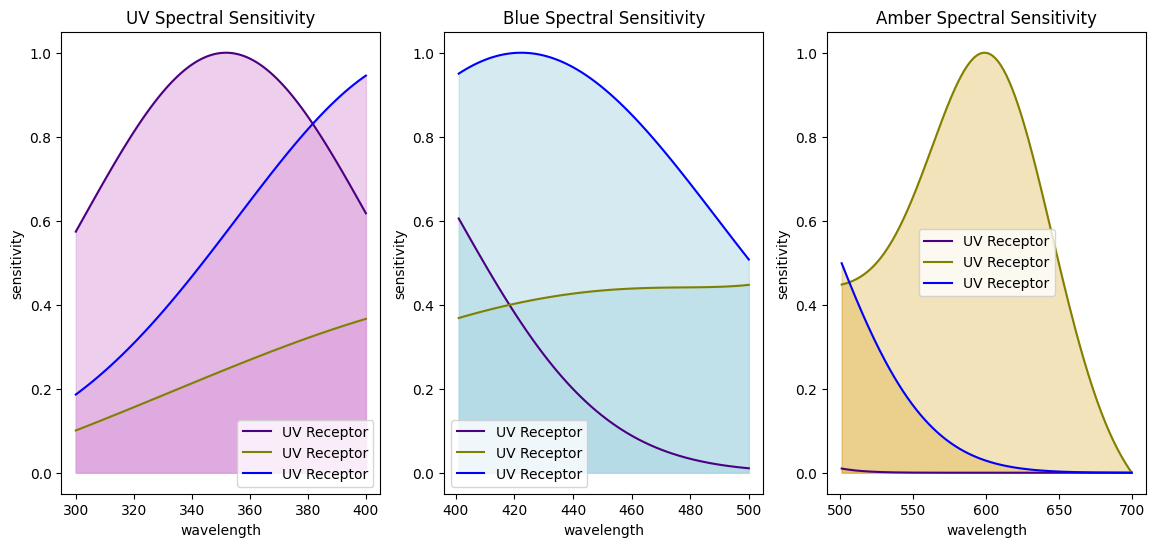

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

# GROUP 1

axes[0].plot(x[np.where(x[:] <= 400)], uv[np.where(x[:] <= 400)], color='indigo', label='UV Receptor')
axes[0].plot(x[np.where(x[:] <= 400)], amber[np.where(x[:] <= 400)], color='olive', label='UV Receptor')
axes[0].plot(x[np.where(x[:] <= 400)], blue[np.where(x[:] <= 400)], color='blue', label='UV Receptor')

axes[0].set_xlabel("wavelength")
axes[0].set_ylabel("sensitivity")
axes[0].set_title("UV Spectral Sensitivity")
axes[0].legend()

axes[0].fill_between(x[np.where(x[:] <= 400)], uv[np.where(x[:] <= 400)], color=(221/256, 160/256, 221/256, 0.5))
axes[0].fill_between(x[np.where(x[:] <= 400)], amber[np.where(x[:] <= 400)], color=(221/256, 160/256, 221/256, 0.5))
axes[0].fill_between(x[np.where(x[:] <= 400)], blue[np.where(x[:] <= 400)], color=(221/256, 160/256, 221/256, 0.5))

# GROUP 2

axes[1].plot(x[np.where((400 < x[:]) & (x[:] <= 500))], uv[np.where((400 < x[:]) & (x[:] <= 500))], color='indigo', label='UV Receptor')
axes[1].plot(x[np.where((400 < x[:]) & (x[:] <= 500))], amber[np.where((400 < x[:]) & (x[:] <= 500))], color='olive', label='UV Receptor')
axes[1].plot(x[np.where((400 < x[:]) & (x[:] <= 500))], blue[np.where((400 < x[:]) & (x[:] <= 500))], color='blue', label='UV Receptor')

axes[1].set_xlabel("wavelength")
axes[1].set_ylabel("sensitivity")
axes[1].set_title("Blue Spectral Sensitivity")
axes[1].legend()

axes[1].fill_between(x[np.where((400 < x[:]) & (x[:] <= 500))], uv[np.where((400 < x[:]) & (x[:] <= 500))], color=(173/256, 216/256, 230/256, 0.5))
axes[1].fill_between(x[np.where((400 < x[:]) & (x[:] <= 500))], amber[np.where((400 < x[:]) & (x[:] <= 500))], color=(173/256, 216/256, 230/256, 0.5))
axes[1].fill_between(x[np.where((400 < x[:]) & (x[:] <= 500))], blue[np.where((400 < x[:]) & (x[:] <= 500))], color=(173/256, 216/256, 230/256, 0.5))

# GROUP 3

axes[2].plot(x[np.where((x[:] > 500))], uv[np.where((x[:] > 500))], color='indigo', label='UV Receptor')
axes[2].plot(x[np.where((x[:] > 500))], amber[np.where((x[:] > 500))], color='olive', label='UV Receptor')
axes[2].plot(x[np.where((x[:] > 500))], blue[np.where((x[:] > 500))], color='blue', label='UV Receptor')

axes[2].set_xlabel("wavelength")
axes[2].set_ylabel("sensitivity")
axes[2].set_title("Amber Spectral Sensitivity")
axes[2].legend()

axes[2].fill_between(x[np.where((x[:] > 500))], uv[np.where((x[:] > 500))], color=(218/256, 165/256, 32/256, 0.3))
axes[2].fill_between(x[np.where((x[:] > 500))], amber[np.where((x[:] > 500))], color=(218/256, 165/256, 32/256, 0.3))
axes[2].fill_between(x[np.where((x[:] > 500))], blue[np.where((x[:] > 500))], color=(218/256, 165/256, 32/256, 0.3))

In [84]:
uvSum = (np.sum(uv[np.where(x[:] <= 400)]) + np.sum(amber[np.where(x[:] <= 400)]) + np.sum(blue[np.where(x[:] <= 400)]) ) * 100
uvSum

16646.375812100003

In [85]:

blueSum = (np.sum(uv[np.where((400 < x[:]) & (x[:] <= 500))]) + np.sum(amber[np.where((400 < x[:]) & (x[:] <= 500))]) + np.sum(blue[np.where((400 < x[:]) & (x[:] <= 500))])) * 100
blueSum

14690.034661599999

In [86]:
amberSum = (np.sum(uv[np.where((x[:] > 500))]) + np.sum(amber[np.where((x[:] >= 500))]) + np.sum(blue[np.where((x[:] >= 500))])) * 200
amberSum


28207.902273013802

Next we create percantages

In [88]:
uvSum / (uvSum + blueSum + amberSum)

0.2795628170722098

In [89]:
blueSum / (uvSum + blueSum + amberSum)

0.2467076028585237

In [90]:
amberSum / (uvSum + blueSum + amberSum)

0.47372958006926646

Final values for Luma for Drosophila are:

$$L_{U_V BA} = 0.2796 U_V + 0.2467 B + 0.4737 A$$